## Import

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import jarque_bera, anderson , norm,kstest
from scipy.stats import skew, kurtosis

1995년에 발표한 skewness and kurtosis를 활용한 정규성 평가 - West 연구논문에 의하면 <br/>
"skewness(=왜도)는 2, kurtosis(=첨도)는 7보다 작으면 <br/>
정규분포에서 크게 벗어나지 않고 정규성을 보인다" 

(0.001, 1000.0)

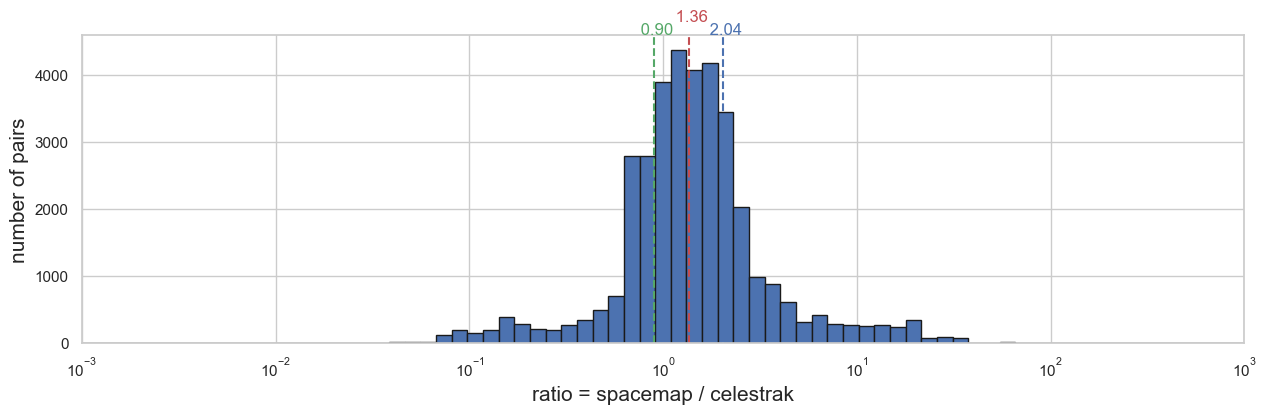

In [36]:

# data_trueprob=  pd.read_csv('C:/Users/kuils/Desktop/프로그래밍/TLE/MYTLE/spacemap_prj/Alfano/Alfano_24d13h_total.csv')#ground
data_hist = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Main/Alfano Pcmax/Conjunction assesement result/Spacemap_CA_Result(Variable_HBR)/Spacemap_CA_09m24d13h.csv')
data_hist= data_hist['ERROR(RATIO)'][1::2] # spacemap category만 저장

# 중앙값과 사분위수 
median, q1,q3= np.median(data_hist), np.percentile(data_hist, 25),np.percentile(data_hist, 75)

# 중앙값과 사분위수를 그래프에 표시
plt.figure(figsize=(15,4))
log_bins = np.logspace(np.log10(1e-04), np.log10(1e04), 100)

plt.hist(data_hist, bins=log_bins, range= (-1000,1000), edgecolor='k')

plt.axvline(median, color='r', linestyle='--', label='Median')
plt.axvline(q1, color='g', linestyle='--', label='Q1')
plt.axvline(q3, color='b', linestyle='--', label='Q3')
plt.text(median, 4800, f' {median:.2f}', color='r', ha='center')
plt.text(q1, 4600, f' {q1:.2f}', color='g',ha='center')
plt.text(q3, 4600, f' {q3:.2f}', color='b', ha='center')
plt.ylabel(ylabel="number of pairs",fontsize=15)
plt.xlabel(xlabel="ratio = spacemap / celestrak",fontsize=15)
plt.xscale('log',base=10)
plt.xlim(1e-03,1e03)

귀무가설 : ERROR(RATIO)의 분포가 정규분포를 따른다.<br/>
Test : Kolmogorov-Smirnov test & Jarque–Bera test

In [37]:
#Kolmogorov-Smirnov test
KS_test = kstest(data_hist,'norm')
KS_statistic, KS_pvalue= KS_test
KS_pvalue = round(KS_pvalue, 10)
print('Kolmogorov-Smirnov test')
print(f'검정 통계치 : {KS_statistic}')
print(f'pvalue : {KS_pvalue}\n')

#Jarque–Bera test
jb_test = jarque_bera(data_hist)
jb_statistic, jb_pvalue= jb_test
jb_pvalue = round(jb_pvalue,10)
print('Jarque–Bera test')
print(f'검정 통계치 : {jb_statistic}')
print(f'pvalue : {jb_pvalue}\n')

# 왜도
a=skew(data_hist)
# 첨도
b= kurtosis(data_hist, fisher=True)
print(f'왜도: {a}, 첨도: {b}')

Kolmogorov-Smirnov test
검정 통계치 : 0.6343496178945083
pvalue : 0.0

Jarque–Bera test
검정 통계치 : 45734187.011189856
pvalue : 0.0

왜도: 8.898672050009486, 첨도: 172.50368285810063


In [38]:
import pandas as pd
row_index = ['Kolmogorov-Smirnov test', 'Jarque–Bera test']
col_index = ['검정통계치', 'p-value']

stat = [[KS_statistic,KS_pvalue],[jb_statistic,jb_pvalue]]
# 배열을 데이터프레임으로 변환하고 인덱스를 설정
df = pd.DataFrame(stat, index=row_index, columns=col_index)

# CSV 파일에 쓰기
df.to_csv('output.csv')

## 히스토그램의 kernel density function 

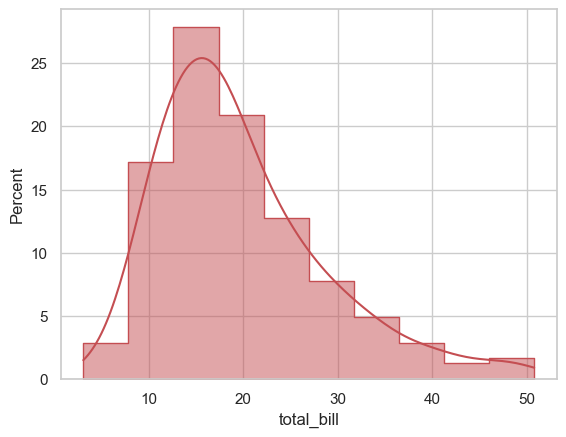

In [6]:
data_trueprob = pd.read_csv('C:/Users/VDRC/Desktop/파이썬폴더/spacemap_prj/Main/Alfano Pcmax/Conjunction assesement result/Spacemap_CA_Result(Variable_HBR)/Spacemap_CA_09m24d13h.csv')

import seaborn as sns
sns.set_theme(style='whitegrid')
tip_df = sns.load_dataset('tips') 
ax = sns.histplot(x=tip_df['total_bill'],
                  color='r', ## 색상                 
                  bins=10, ## bin 개수                  
                  kde=True, ## 밀도 함수 곡선 추가                 
                  element='step', ## 히스토그램 표시형식,                  
                  stat='percent', ## y값 계산 방식 count                  
                  cumulative=False, ## True인 경우 누적 분포 형태로 그림                
                    )